<a href="https://colab.research.google.com/github/saithepaithewhyyy/saipraneeth_aimlbcs_210900/blob/main/digit_recognition_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten number recognition using Tensorflow

In this notebook, I will be using the tensorflow library to build a basic neural network that will identify handwritten digits.

The model is trained using the MNIST dataset which contains around 60,000 test images and will make predictions on 10,000 images

In [43]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

%matplotlib inline

In [44]:
#importing and storing the dataset
mnist = tf.keras.datasets.mnist          
(X_train, y_train),(X_test, y_test) = mnist.load_data() 

In [45]:
#since sigmoid function is used, the image datasets are scaled down to 0 to 1 range

X_train = X_train/255
X_test = X_test/255

In [46]:
# each image is 28*28 pixels  
X_train.shape

(60000, 28, 28)

7

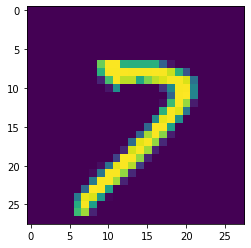

In [47]:
plt.imshow(X_train[567])
y_train[567]

In [48]:
# creating the model object
model = tf.keras.models.Sequential()

# adding a flatten layer which will flatten the 2d 28*28 image to a 1d 1*784 array 
model.add(tf.keras.layers.Flatten())

#adding the input and one hidden layer which uses the sigmoid activation, furthermore other activations like relu or softmax can be used
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))

#adding the final output layer which gives output with 10 neurons, one for each digit
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))

In [49]:
# compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [50]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4374 - accuracy: 0.8849
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1696 - accuracy: 0.9493
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1169 - accuracy: 0.9651
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [51]:
#evalutaing the model
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9771


In [52]:
#making predictions on the test dataset
predictions = model.predict(X_test)

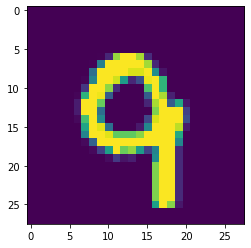

In [53]:
plt.imshow(X_test[678])


In [54]:
print(predictions[678])
print(np.argmax(predictions[678]))

[5.2171163e-08 3.2323746e-09 9.8367785e-09 9.1166578e-07 1.2167067e-06
 2.3817154e-07 3.9327475e-09 7.5797738e-07 5.0904310e-07 2.5466201e-01]
9
